# Information Metrics

This notebooks runs information theory metrics on time series signals, including several entropy measures. 

This notebook includes:
- approximate entropy
- sample entropy
- permutation entropy
- weighted permutation entropy

Notes:
- sample & approximate entroy are pretty similar, maybe don't need both (?)
- other metrics we don't currently consider: multiscale entropy, weighted permutation entropy
- there are important parameter inputs to these measures, that could be explored

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from neurodsp.sim import sim_powerlaw, sim_synaptic_current, sim_combined
from neurodsp.utils import set_random_seed

In [2]:
# Import custom code
import sys; from pathlib import Path
sys.path.append(str(Path('..').resolve()))

from apm.io import APMDB
from apm.run import run_sims_load
from apm.run import run_sims_parallel as run_sims
from apm.methods import app_entropy, sample_entropy, perm_entropy, wperm_entropy
from apm.methods.settings import (AP_ENT_PARAMS, SA_ENT_PARAMS,
                                  PE_ENT_PARAMS, WPE_ENT_PARAMS)
from apm.plts.base import plot_lines
from apm.plts.sims import plot_ap_sims, plot_pe_sims
from apm.sim.settings import (N_SIMS, FS, EXP, EXPS, KNEES, FREQS, POWERS, BWS,
                              SIM_PARAMS_AP, SIM_PARAMS_COMB, SIM_PARAMS_KNEE)
from apm.sim.examples import SIG_AP, SIG_KN, SIG_OSC, SIG_COMB

/Users/tom/Code/Projects/APMethods/AperiodicMethods/apm/methods/fit.py:16: DeprecationWarning: 
The `fooof` package is being deprecated and replaced by the `specparam` (spectral parameterization) package.
This version of `fooof` (1.1) is fully functional, but will not be further updated.
New projects are recommended to update to using `specparam` (see Changelog for details).
  from fooof import FOOOF


## Settings

In [3]:
# Custom settings
N_SIMS = 10

In [4]:
# Check settings for entropy measures
print('Approximate Entropy:\t', AP_ENT_PARAMS)
print('Sample Entropy: \t', SA_ENT_PARAMS)
print('Permutation Entropy:\t', PE_ENT_PARAMS)
print('WPermutation Entropy:\t', WPE_ENT_PARAMS)

Approximate Entropy:	 {'order': 2}
Sample Entropy: 	 {'order': 2}
Permutation Entropy:	 {'order': 3, 'delay': 1}
WPermutation Entropy:	 {'order': 3, 'delay': 1}


In [5]:
# Set the random seed
set_random_seed(111)

In [6]:
# Settings for saving figures
SAVE_FIG = True
EXT = '.pdf'
FIGPATH = APMDB().figs_path / '18_entropy'

In [7]:
# Settings for loading simulations
SIMPATH = APMDB().sims_path / 'time_series'

## Calculating Entropy Measures on Example Signals

Entropy measures generally measure the level of 'randomness' or complexity in a signal. 

In all cases, smaller values of measured entropy indicate more regular time series. 

In [8]:
print('Computed approximate entropy:')
print('  powerlaw: \t {:1.4f}'.format(app_entropy(SIG_AP, **AP_ENT_PARAMS)))
print('  osc:      \t {:1.4f}'.format(app_entropy(SIG_OSC, **AP_ENT_PARAMS)))
print('  combined: \t {:1.4f}'.format(app_entropy(SIG_COMB, **AP_ENT_PARAMS)))
print('  knee:     \t {:1.4f}'.format(app_entropy(SIG_KN, **AP_ENT_PARAMS)))

Computed approximate entropy:
  powerlaw: 	 0.5145
  osc:      	 0.2689
  combined: 	 1.1378
  knee:     	 1.7298


In [9]:
print('Computed sample entropy:')
print('  powerlaw: \t {:1.4f}'.format(sample_entropy(SIG_AP, **SA_ENT_PARAMS)))
print('  osc:      \t {:1.4f}'.format(sample_entropy(SIG_OSC, **SA_ENT_PARAMS)))
print('  combined: \t {:1.4f}'.format(sample_entropy(SIG_COMB, **SA_ENT_PARAMS)))
print('  knee:     \t {:1.4f}'.format(sample_entropy(SIG_KN, **SA_ENT_PARAMS)))

Computed sample entropy:
  powerlaw: 	 0.4686
  osc:      	 0.2457
  combined: 	 1.0416
  knee:     	 1.6269


In [10]:
print('Computed permutation entropy:')
print('  powerlaw: \t {:1.4f}'.format(perm_entropy(SIG_AP, **PE_ENT_PARAMS)))
print('  osc:      \t {:1.4f}'.format(perm_entropy(SIG_OSC, **PE_ENT_PARAMS)))
print('  combined: \t {:1.4f}'.format(perm_entropy(SIG_COMB, **PE_ENT_PARAMS)))
print('  knee:     \t {:1.4f}'.format(perm_entropy(SIG_KN, **PE_ENT_PARAMS)))

Computed permutation entropy:
  powerlaw: 	 2.5200
  osc:      	 1.2411
  combined: 	 2.5148
  knee:     	 2.5227


## Approximate Entropy

Approximate entropy quantifies the unpredictability of a time series.

#### Aperiodic Variations

In [11]:
# Run simulations calculating approximate entropy across exponents
ap_sims_exp, ap_sims_exp_var = run_sims(\
    sim_powerlaw, SIM_PARAMS_AP, app_entropy, 
    AP_ENT_PARAMS, 'update_exp', EXPS, N_SIMS)

In [12]:
# Run simulations calculating approximate entropy across exponents, with an oscillation
ap_sims_comb, ap_sims_exp_comb_var = run_sims(\
    sim_combined, SIM_PARAMS_COMB, app_entropy, 
    AP_ENT_PARAMS, 'update_comb_exp', EXPS, N_SIMS)

/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:128: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:128: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


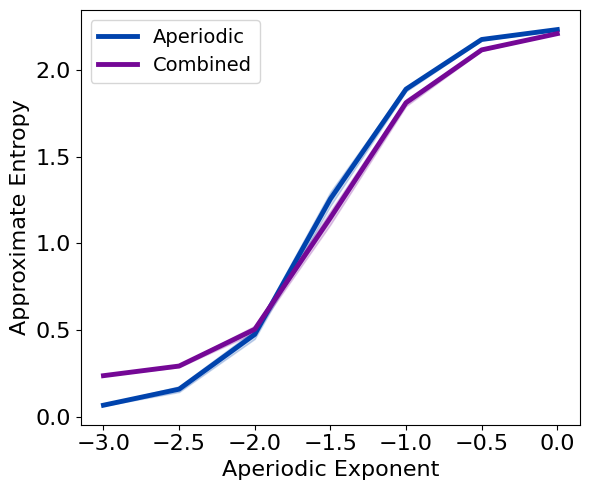

In [13]:
# Plot approximate entropy measures across aperiodic variations
plot_ap_sims(ap_sims_exp, ap_sims_exp_var, ap_sims_comb, ap_sims_exp_comb_var,
             'Approximate Entropy', save_fig=SAVE_FIG, 
             file_name='ap_ap' + EXT, file_path=FIGPATH)

#### Periodic Variations

In [14]:
# Run simulations calculating approximate entropy across oscillation frequency
ap_sims_freq, ap_sims_freq_var = run_sims(\
    sim_combined, SIM_PARAMS_COMB, app_entropy,
    AP_ENT_PARAMS, 'update_freq', FREQS, N_SIMS)

In [15]:
# Run simulations calculating approximate entropy across oscillation power
ap_sims_pow, ap_sims_pow_var = run_sims(\
    sim_combined, SIM_PARAMS_COMB, app_entropy, 
    AP_ENT_PARAMS, 'update_pow', POWERS, N_SIMS)

/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:128: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


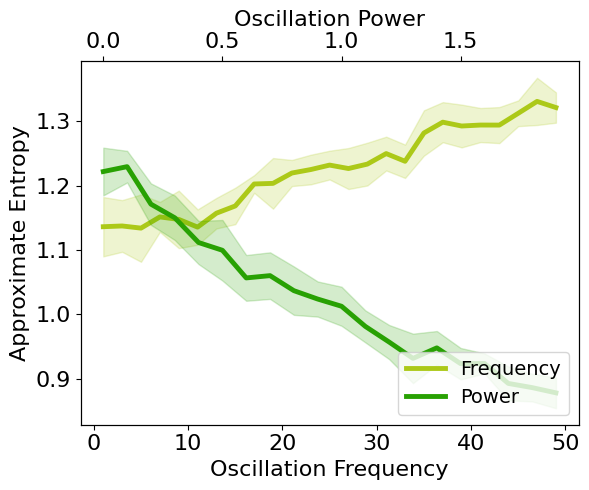

In [16]:
# Plot approximate entropy measures across aperiodic variations
plot_pe_sims(ap_sims_freq, ap_sims_freq_var, ap_sims_pow, ap_sims_pow_var,
             'Approximate Entropy', save_fig=SAVE_FIG, 
             file_name='ap_pe' + EXT, file_path=FIGPATH)

#### Knee Variations

In [17]:
# Run simulations calculating approximate entropy across timescales
ap_sims_knee, ap_sims_knee_var = run_sims(\
    sim_synaptic_current, SIM_PARAMS_KNEE,
    app_entropy, AP_ENT_PARAMS, 'update_knee', KNEES, N_SIMS)

/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:128: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:128: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:128: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


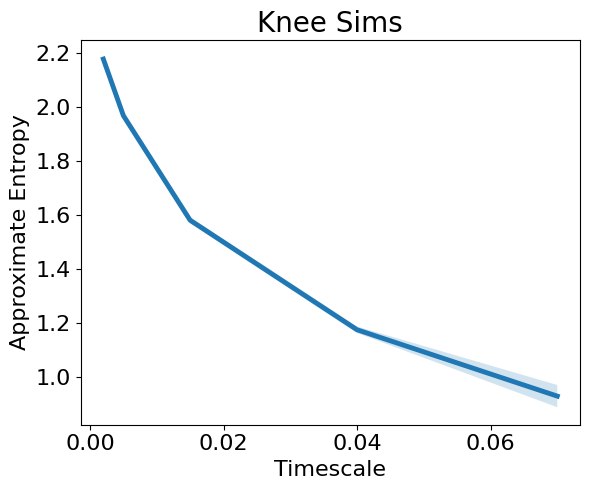

In [18]:
# Plot approximate entropy across different timescales
plot_lines(KNEES, ap_sims_knee, ap_sims_knee_var, figsize=(6, 5))
plot_lines(title='Knee Sims')
plot_lines(xlabel='Timescale', ylabel='Approximate Entropy')
plot_lines(save_fig=SAVE_FIG, file_name='ap_knee' + EXT, file_path=FIGPATH)

#### Peak Variations

In [19]:
# Run simulations calculating approximate entropy across peak bandwidths (sims from file)
ap_sims_bw, ap_sims_bw_var = run_sims_load(\
    SIMPATH / 'ts_sims_comb_bw', app_entropy, AP_ENT_PARAMS)

/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:128: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:128: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:128: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


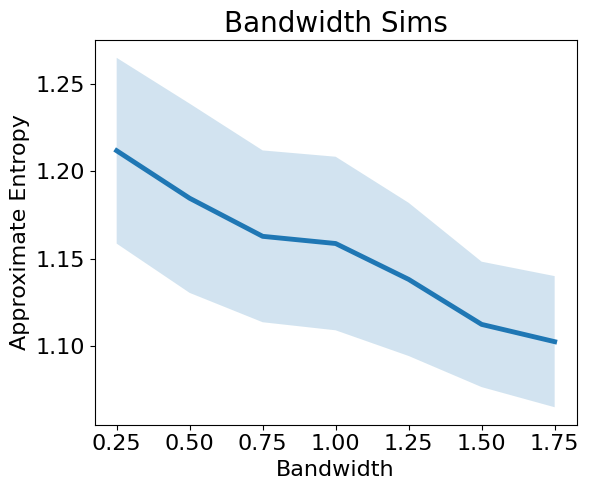

In [20]:
# Plot approximate entropy across peak bandwidth
plot_lines(BWS, ap_sims_bw, ap_sims_bw_var, figsize=(6, 5))
plot_lines(title='Bandwidth Sims')
plot_lines(xlabel='Bandwidth', ylabel='Approximate Entropy')
plot_lines(save_fig=SAVE_FIG, file_name='ap_bw' + EXT, file_path=FIGPATH)

## Sample Entropy

Sample entropy is a modification of approxmiate entropy for physiological time series.

The modifications of sample entropy make it data length independent.

#### Aperiodic Variations

In [21]:
# Run simulations calculating sample entropy across exponents
sa_sims_exp, sa_sims_exp_var = run_sims(\
    sim_powerlaw, SIM_PARAMS_AP, sample_entropy, 
    SA_ENT_PARAMS, 'update_exp', EXPS, N_SIMS)

In [22]:
# Run simulations calculating sample entropy across exponents, with an oscillation
sa_sims_comb, sa_sims_exp_comb_var = run_sims(\
    sim_combined, SIM_PARAMS_COMB, sample_entropy, 
    SA_ENT_PARAMS, 'update_comb_exp', EXPS, N_SIMS)

/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:128: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:128: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


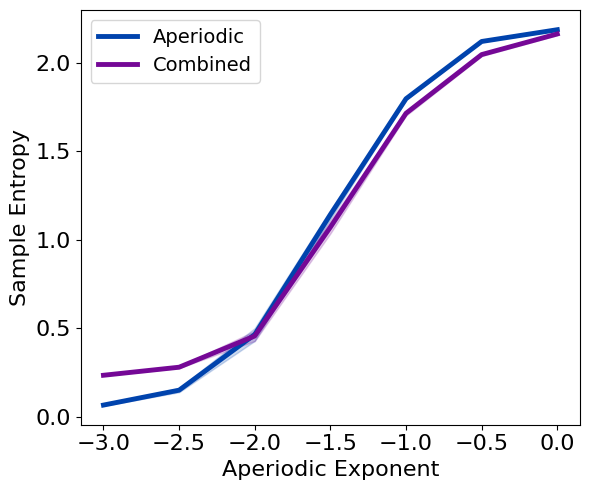

In [23]:
# Plot sample entropy measures across aperiodic variations
plot_ap_sims(sa_sims_exp, sa_sims_exp_var, sa_sims_comb, sa_sims_exp_comb_var,
             'Sample Entropy', save_fig=SAVE_FIG,
             file_name='sa_ap' + EXT, file_path=FIGPATH)

#### Periodic Variations

In [24]:
# Run simulations calculating sample entropy across oscillation frequency
sa_sims_freq, sa_sims_freq_var = run_sims(\
    sim_combined, SIM_PARAMS_COMB, sample_entropy, 
    SA_ENT_PARAMS, 'update_freq', FREQS, N_SIMS)

In [25]:
# Run simulations calculating sample entropy across oscillation power
sa_sims_pow, sa_sims_pow_var = run_sims(\
    sim_combined, SIM_PARAMS_COMB, sample_entropy, 
    SA_ENT_PARAMS, 'update_pow', POWERS, N_SIMS)

/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:128: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


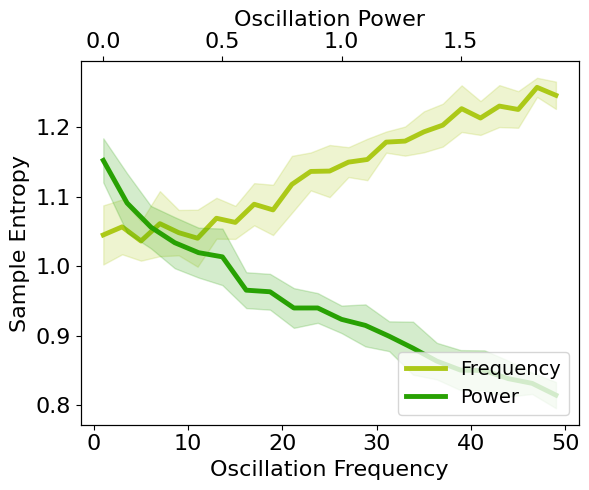

In [26]:
# Plot sample entropy measures across periodic variations
plot_pe_sims(sa_sims_freq, sa_sims_freq_var, sa_sims_pow, sa_sims_pow_var,
             'Sample Entropy', save_fig=SAVE_FIG,
             file_name='sa_pe' + EXT, file_path=FIGPATH)

#### Knee Variations

In [27]:
# Run simulations calculating sample entropy across timescales
sa_sims_knee, sa_sims_knee_var = run_sims(\
    sim_synaptic_current, SIM_PARAMS_KNEE,
    sample_entropy, SA_ENT_PARAMS, 'update_knee', KNEES, N_SIMS)

/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:128: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:128: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:128: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


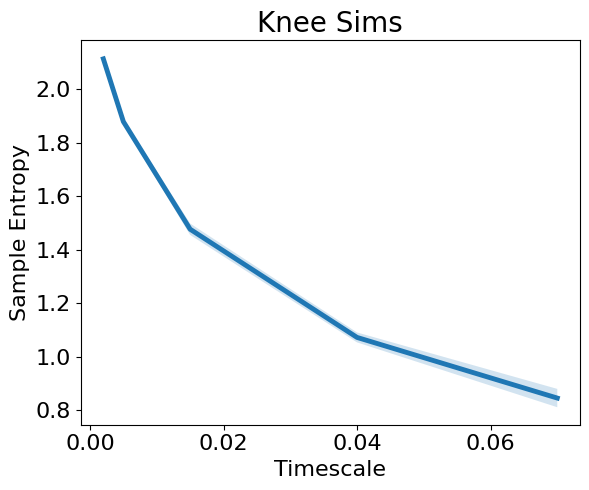

In [28]:
# Plot sample entropy across different timescales
plot_lines(KNEES, sa_sims_knee, sa_sims_knee_var, figsize=(6, 5))
plot_lines(title='Knee Sims')
plot_lines(xlabel='Timescale', ylabel='Sample Entropy')
plot_lines(save_fig=SAVE_FIG, file_name='sa_knee' + EXT, file_path=FIGPATH)

#### Peak Variations

In [29]:
# Run simulations calculating sample entropy across peak bandwidths (sims from file)
sa_sims_bw, sa_sims_bw_var = run_sims_load(\
    SIMPATH / 'ts_sims_comb_bw', sample_entropy, SA_ENT_PARAMS)

/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:128: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:128: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:128: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


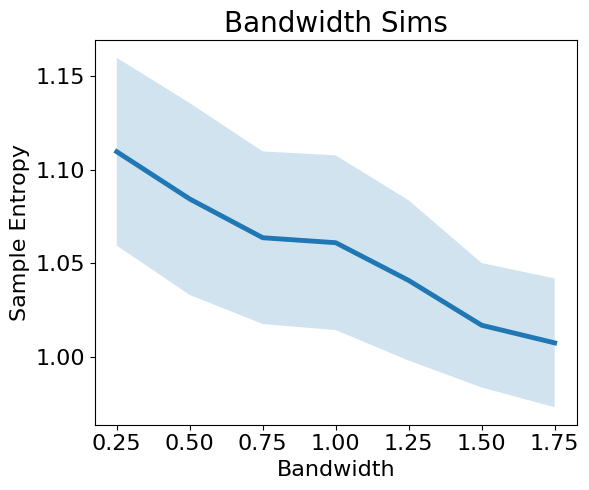

In [30]:
# Plot sample entropy across peak bandwidth
plot_lines(BWS, sa_sims_bw, sa_sims_bw_var, figsize=(6, 5))
plot_lines(title='Bandwidth Sims')
plot_lines(xlabel='Bandwidth', ylabel='Sample Entropy')
plot_lines(save_fig=SAVE_FIG, file_name='sa_bw' + EXT, file_path=FIGPATH)

## Permutation Entropy

Permutation entropy is a measure of entropy based on the probabilities of sequences within the time series.

Permutation entropy was introduced in 2002 by Bandt & Pompe.

#### Aperiodic Variations

In [31]:
# Run simulations calculating permutation entropy across exponents
pe_sims_exp, pe_sims_exp_var = run_sims(\
    sim_powerlaw, SIM_PARAMS_AP, perm_entropy,
    PE_ENT_PARAMS, 'update_exp', EXPS, N_SIMS)

In [32]:
# Run simulations calculating permutation entropy across exponents, with an oscillation
pe_sims_comb, pe_sims_exp_comb_var = run_sims(\
    sim_combined, SIM_PARAMS_COMB, perm_entropy,
    PE_ENT_PARAMS, 'update_comb_exp', EXPS, N_SIMS)

/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:128: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:128: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


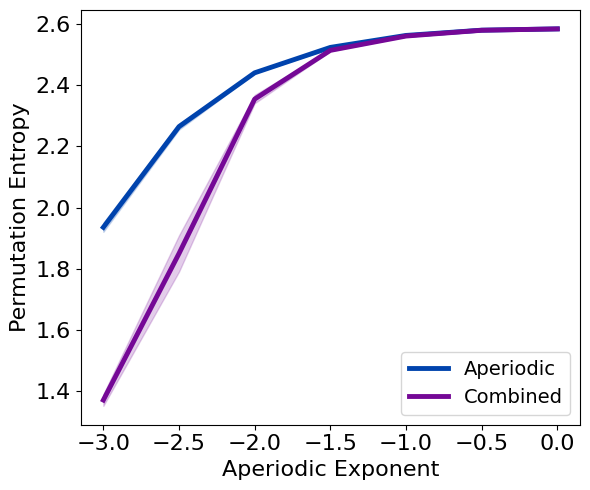

In [33]:
# Plot permutation entropy measures across periodic variations
plot_ap_sims(pe_sims_exp, pe_sims_exp_var, pe_sims_comb, pe_sims_exp_comb_var,
             'Permutation Entropy', save_fig=SAVE_FIG,
             file_name='pe_ap' + EXT, file_path=FIGPATH)

In [34]:
# Run simulations calculating permutation entropy across oscillation frequency
pe_sims_freq, pe_sims_freq_var = run_sims(\
    sim_combined, SIM_PARAMS_COMB, perm_entropy,
    PE_ENT_PARAMS, 'update_freq', FREQS, N_SIMS)

In [35]:
# Run simulations calculating permutation entropy across oscillation power
pe_sims_pow, pe_sims_pow_var = run_sims(\
    sim_combined, SIM_PARAMS_COMB, perm_entropy,
    PE_ENT_PARAMS, 'update_pow', POWERS, N_SIMS)

/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:128: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


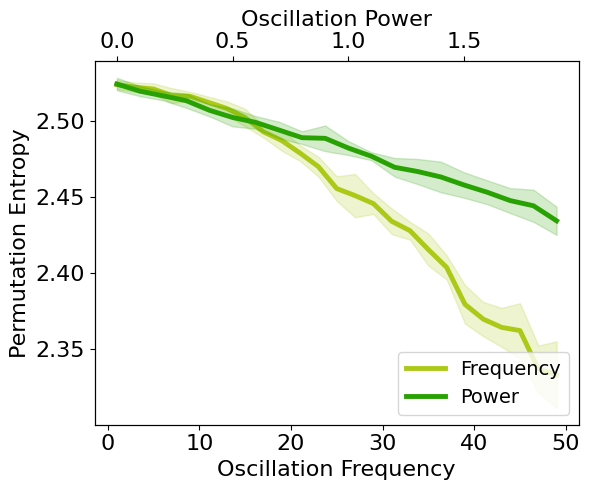

In [36]:
# Plot permutation entropy measures across periodic variations
plot_pe_sims(pe_sims_freq, pe_sims_freq_var, pe_sims_pow, pe_sims_pow_var,
             'Permutation Entropy', save_fig=SAVE_FIG,
             file_name='pe_pe' + EXT, file_path=FIGPATH)

#### Knee Variations

In [37]:
# Run simulations calculating permutation entropy across timescales
pe_sims_knee, pe_sims_knee_var = run_sims(\
    sim_synaptic_current, SIM_PARAMS_KNEE,
    perm_entropy, PE_ENT_PARAMS, 'update_knee', KNEES, N_SIMS)

/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:128: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:128: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:128: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


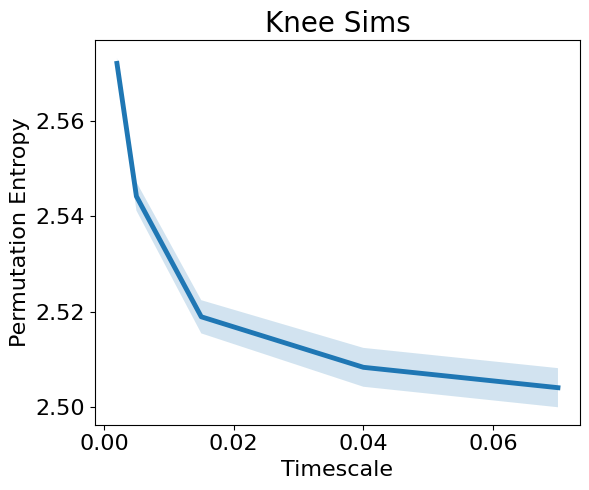

In [38]:
# Plot permutation entropy across different timescales
plot_lines(KNEES, pe_sims_knee, pe_sims_knee_var, figsize=(6, 5))
plot_lines(title='Knee Sims')
plot_lines(xlabel='Timescale', ylabel='Permutation Entropy')
plot_lines(save_fig=SAVE_FIG, file_name='pe_knee' + EXT, file_path=FIGPATH)

#### Peak Variations

In [39]:
# Run simulations calculating permutation entropy across peak bandwidths (sims from file)
pe_sims_bw, pe_sims_bw_var = run_sims_load(\
    SIMPATH / 'ts_sims_comb_bw', perm_entropy, PE_ENT_PARAMS)

/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:128: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:128: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:128: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


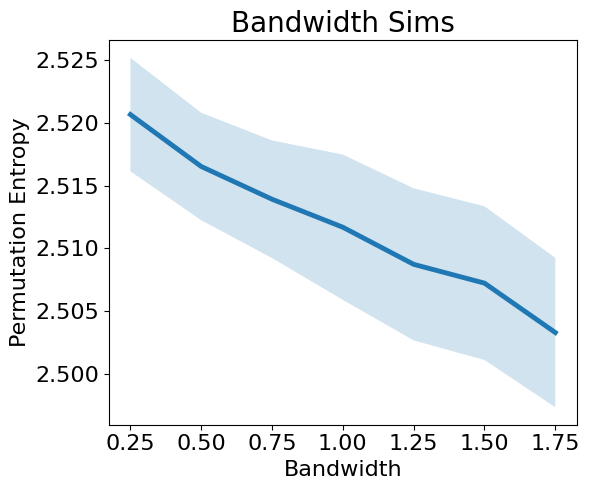

In [40]:
# Plot permutation entropy across peak bandwidth
plot_lines(BWS, pe_sims_bw, pe_sims_bw_var, figsize=(6, 5))
plot_lines(title='Bandwidth Sims')
plot_lines(xlabel='Bandwidth', ylabel='Permutation Entropy')
plot_lines(save_fig=SAVE_FIG, file_name='pe_bw' + EXT, file_path=FIGPATH)

## Weighted Permutation Entropy

#### Aperiodic Variations

In [41]:
# Run simulations calculating weighted permutation entropy across exponents
wpe_sims_exp, wpe_sims_exp_var = run_sims(\
    sim_powerlaw, SIM_PARAMS_AP, wperm_entropy, 
    WPE_ENT_PARAMS, 'update_exp', EXPS, N_SIMS)

/Users/tom/Code/Projects/APMethods/AperiodicMethods/apm/methods/fit.py:16: DeprecationWarning: 
The `fooof` package is being deprecated and replaced by the `specparam` (spectral parameterization) package.
This version of `fooof` (1.1) is fully functional, but will not be further updated.
New projects are recommended to update to using `specparam` (see Changelog for details).
  from fooof import FOOOF
/Users/tom/Code/Projects/APMethods/AperiodicMethods/apm/methods/fit.py:16: DeprecationWarning: 
The `fooof` package is being deprecated and replaced by the `specparam` (spectral parameterization) package.
This version of `fooof` (1.1) is fully functional, but will not be further updated.
New projects are recommended to update to using `specparam` (see Changelog for details).
  from fooof import FOOOF
/Users/tom/Code/Projects/APMethods/AperiodicMethods/apm/methods/fit.py:16: DeprecationWarning: 
The `fooof` package is being deprecated and replaced by the `specparam` (spectral parameterizati

In [42]:
# Run simulations calculating weighted permutation entropy across exponents, with an oscillation
wpe_sims_comb, wpe_sims_exp_comb_var = run_sims(\
    sim_combined, SIM_PARAMS_COMB, wperm_entropy, 
    WPE_ENT_PARAMS, 'update_comb_exp', EXPS, N_SIMS)

/Users/tom/Code/Projects/APMethods/AperiodicMethods/apm/methods/fit.py:16: DeprecationWarning: 
The `fooof` package is being deprecated and replaced by the `specparam` (spectral parameterization) package.
This version of `fooof` (1.1) is fully functional, but will not be further updated.
New projects are recommended to update to using `specparam` (see Changelog for details).
  from fooof import FOOOF
/Users/tom/Code/Projects/APMethods/AperiodicMethods/apm/methods/fit.py:16: DeprecationWarning: 
The `fooof` package is being deprecated and replaced by the `specparam` (spectral parameterization) package.
This version of `fooof` (1.1) is fully functional, but will not be further updated.
New projects are recommended to update to using `specparam` (see Changelog for details).
  from fooof import FOOOF
/Users/tom/Code/Projects/APMethods/AperiodicMethods/apm/methods/fit.py:16: DeprecationWarning: 
The `fooof` package is being deprecated and replaced by the `specparam` (spectral parameterizati

/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:128: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:128: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


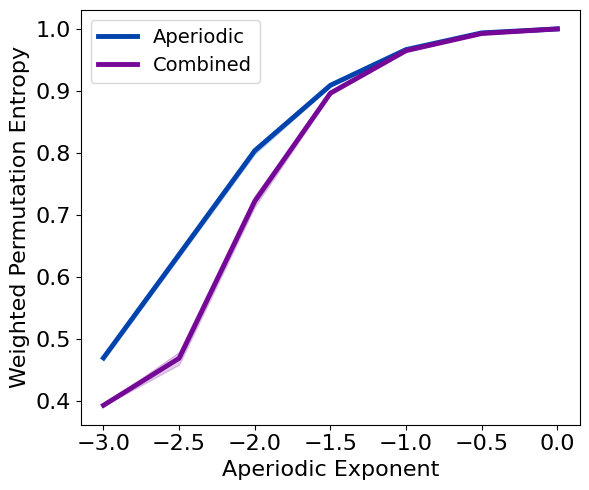

In [43]:
# Plot weighted permutation entropy measures across periodic variations
plot_ap_sims(wpe_sims_exp, wpe_sims_exp_var, wpe_sims_comb, wpe_sims_exp_comb_var,
             'Weighted Permutation Entropy', save_fig=SAVE_FIG, 
             file_name='pe_ap' + EXT, file_path=FIGPATH)

#### Periodic Variations

In [44]:
# Run simulations calculating weighted permutation entropy across oscillation frequency
wpe_sims_freq, wpe_sims_freq_var = run_sims(\
    sim_combined, SIM_PARAMS_COMB, wperm_entropy, 
    WPE_ENT_PARAMS, 'update_freq', FREQS, N_SIMS)

/Users/tom/Code/Projects/APMethods/AperiodicMethods/apm/methods/fit.py:16: DeprecationWarning: 
The `fooof` package is being deprecated and replaced by the `specparam` (spectral parameterization) package.
This version of `fooof` (1.1) is fully functional, but will not be further updated.
New projects are recommended to update to using `specparam` (see Changelog for details).
  from fooof import FOOOF
/Users/tom/Code/Projects/APMethods/AperiodicMethods/apm/methods/fit.py:16: DeprecationWarning: 
The `fooof` package is being deprecated and replaced by the `specparam` (spectral parameterization) package.
This version of `fooof` (1.1) is fully functional, but will not be further updated.
New projects are recommended to update to using `specparam` (see Changelog for details).
  from fooof import FOOOF
/Users/tom/Code/Projects/APMethods/AperiodicMethods/apm/methods/fit.py:16: DeprecationWarning: 
The `fooof` package is being deprecated and replaced by the `specparam` (spectral parameterizati

In [45]:
# Run simulations calculating weighted permutation entropy across oscillation power
wpe_sims_pow, wpe_sims_pow_var = run_sims(\
    sim_combined, SIM_PARAMS_COMB, wperm_entropy, 
    WPE_ENT_PARAMS, 'update_pow', POWERS, N_SIMS)

/Users/tom/Code/Projects/APMethods/AperiodicMethods/apm/methods/fit.py:16: DeprecationWarning: 
The `fooof` package is being deprecated and replaced by the `specparam` (spectral parameterization) package.
This version of `fooof` (1.1) is fully functional, but will not be further updated.
New projects are recommended to update to using `specparam` (see Changelog for details).
  from fooof import FOOOF
/Users/tom/Code/Projects/APMethods/AperiodicMethods/apm/methods/fit.py:16: DeprecationWarning: 
The `fooof` package is being deprecated and replaced by the `specparam` (spectral parameterization) package.
This version of `fooof` (1.1) is fully functional, but will not be further updated.
New projects are recommended to update to using `specparam` (see Changelog for details).
  from fooof import FOOOF
/Users/tom/Code/Projects/APMethods/AperiodicMethods/apm/methods/fit.py:16: DeprecationWarning: 
The `fooof` package is being deprecated and replaced by the `specparam` (spectral parameterizati

/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:128: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


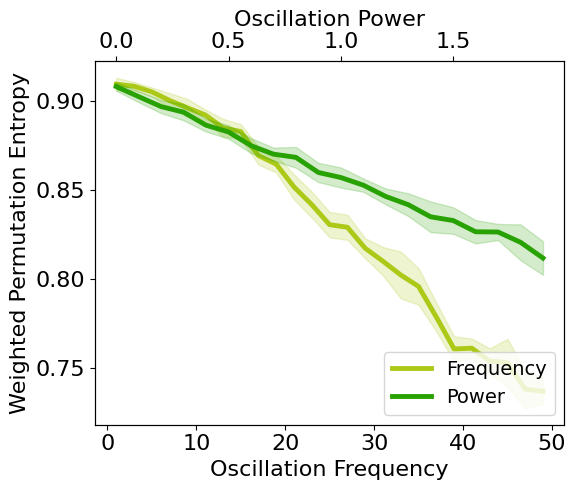

In [46]:
# Plot weighted permutation entropy measures across periodic variations
plot_pe_sims(wpe_sims_freq, wpe_sims_freq_var, wpe_sims_pow, wpe_sims_pow_var,
             'Weighted Permutation Entropy', save_fig=SAVE_FIG, 
             file_name='pe_pe' + EXT, file_path=FIGPATH)

#### Knee Variations

In [47]:
# Run simulations calculating weighted permutation entropy across timescales
ap_sims_knee, ap_sims_knee_var = run_sims(\
    sim_synaptic_current, SIM_PARAMS_KNEE,
    wperm_entropy, WPE_ENT_PARAMS, 'update_knee', KNEES, N_SIMS)

/Users/tom/Code/Projects/APMethods/AperiodicMethods/apm/methods/fit.py:16: DeprecationWarning: 
The `fooof` package is being deprecated and replaced by the `specparam` (spectral parameterization) package.
This version of `fooof` (1.1) is fully functional, but will not be further updated.
New projects are recommended to update to using `specparam` (see Changelog for details).
  from fooof import FOOOF
/Users/tom/Code/Projects/APMethods/AperiodicMethods/apm/methods/fit.py:16: DeprecationWarning: 
The `fooof` package is being deprecated and replaced by the `specparam` (spectral parameterization) package.
This version of `fooof` (1.1) is fully functional, but will not be further updated.
New projects are recommended to update to using `specparam` (see Changelog for details).
  from fooof import FOOOF
/Users/tom/Code/Projects/APMethods/AperiodicMethods/apm/methods/fit.py:16: DeprecationWarning: 
The `fooof` package is being deprecated and replaced by the `specparam` (spectral parameterizati

/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:128: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:128: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:128: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


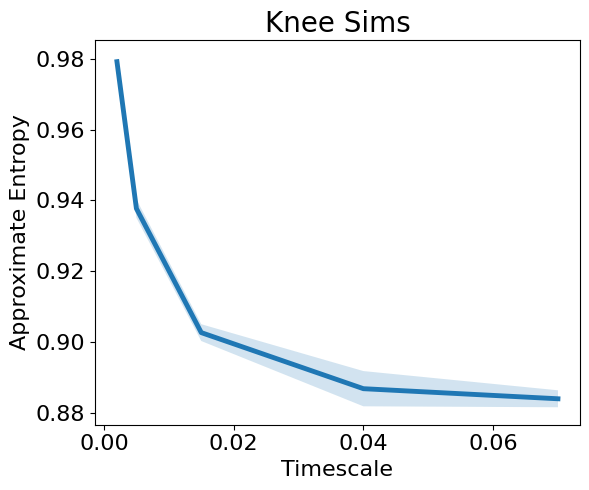

In [48]:
# Plot weighted permutation entropy across different timescales
plot_lines(KNEES, ap_sims_knee, ap_sims_knee_var, figsize=(6, 5))
plot_lines(title='Knee Sims')
plot_lines(xlabel='Timescale', ylabel='Approximate Entropy')
plot_lines(save_fig=SAVE_FIG, file_name='wpe_knee' + EXT, file_path=FIGPATH)

#### Peak Variations

In [49]:
# Run simulations calculating weighted permutation entropy across peak bandwidths (sims from file)
ap_sims_bw, ap_sims_bw_var = run_sims_load(\
    SIMPATH / 'ts_sims_comb_bw', wperm_entropy, WPE_ENT_PARAMS)

/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:128: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:128: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:128: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


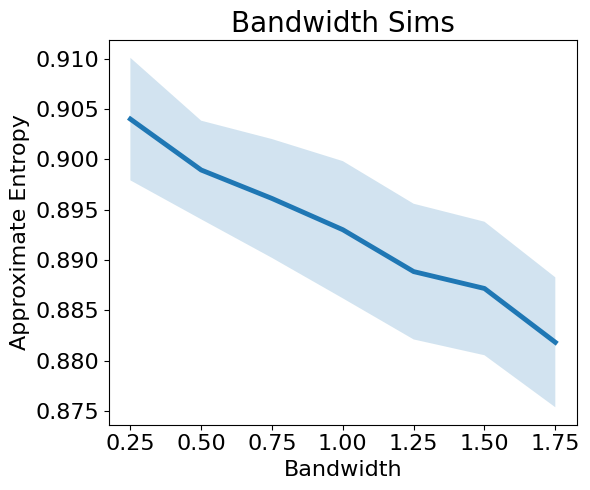

In [50]:
# Plot weighted permutation entropy across peak bandwidth
plot_lines(BWS, ap_sims_bw, ap_sims_bw_var, figsize=(6, 5))
plot_lines(title='Bandwidth Sims')
plot_lines(xlabel='Bandwidth', ylabel='Approximate Entropy')
plot_lines(save_fig=SAVE_FIG, file_name='wpe_bw' + EXT, file_path=FIGPATH)

## Conclusions

Overall, we can see the following patterns in these simulations:

Entropy (general patterns across all):
- Entropy increases for decreasing aperiodic exponents, non-linearly
- Entropy decreases for increasing oscillatory power, approximately linearly